In [188]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
import requests
from bs4 import BeautifulSoup

import re

In [190]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [191]:
# 전처리 리스트
li_brands = ['CU', 'GS25', 'GS수퍼마켓', '농협', '롯데마트', '롯데백화점', '롯데슈퍼', '세븐일레븐',
       '신세계백화점', '이마트', '현대백화점', '홈플러스']
li_groceries = ['소면','국수','만두','당면','두부','라면','밀가루','부침가루','빵','호떡','만쥬','스프','스페설K','콘푸로스트','콘푸라이트',
               '미역국','짜장','카레','오뚜기밥','찰진밥','햇반','우동','야채죽','단팥죽','쇠고기죽','초밥','칩포테이토','포카칩','자일리톨',
               '해태아이스쿨','돼지바','메로나','바밤바','새우깡','가나파이','몽쉘크림','초코파이','초콜렛','목캔디','아이비','참크래커',
               '마가린','7even','떠먹는불가리스','바이오거트','요플레','이오','불가리스','버터','앱솔루트','분유','프리미엄프레쉬','건강한햄',
               '비앤나','롯데햄','소시지','아메리칸후랑크','의성 마늘','우유','드빈치','치즈','슬라이스햄','샌드위치햄','김밥김','맛살',
               '꽁치','어묵','참치','고추장','간장','태양초골드','황도','된장','마요네즈','딸기잼','딸기쨈','설탕','벌꿀','꽃소금',
               '옥수수유','식용유','콩기름','식초','쌈장','참기름','케찹','해물','델몬트','오렌지','현미녹차','베지밀','두유','생막걸리',
               '우국생','HITE','오비골든라거','카스 프레쉬','비타500','비타파워','스프라이트','칠성사이터','삼다수','아이시스','워터라인',
               '참이슬','처음처럼','비락식혜','게토레이','파워에이드','포카리스웨트','순보리차','옥수수수염차','레쓰비','맥스웰 하우스',
               '맥심 티오피','칸타타','맥심모카골드','테이스터스초이스','프렌치까페','카페라떼','코카콜라','펩시콜라','카페오레','김치',
               '콩나물','단무지','월드콘','박카스','배추','부라보콘','구론산','스타벅스','양파','참붕어','몽쉘','칠성사이다','풀무원','스페셜K',
               '네스카페','오리온','감자','고구마','버섯','애호박','대파','막걸리','토스트','남양','당근','동서','마늘','시금치','엔젤리너스','오뚜기',
               '컨피던스','풋고추','샘표','오이','국내산','고등어','롯데','오징어','백설','삼립','씨그램','레드불','비비고','떡','몬스터','탄산수','청정원',
                '오리온','켈로그','팔도','하선정','해태','엔제리너스','스팸','들기름','트레비','굴소스','땅콩','아몬드','적상추','쪽파','생강','양반',
                '투게더','줄기 없는 무', '깻잎','가지', '카스','오비라거','자유시간','하이트','핫브레이크']

li_meat = ['삼겹살','쇠고기등심','쇠고기불고기','달걀','목초란','토종닭','알짜란','백숙','특란','갈치','삼치','참조기','건강란',
          '쇠고기 등심','쇠고기 불고기','돼지고기 목살','부세']

li_necessaries = ['페리오','핸드크림','니베아','해피바스','클링스','치약','2080','샴푸','하기스','면도날','3날','린스','컨디셔너',
                 '이자녹스 테르비나','iope 슈퍼바이탈','염색','미쟝센','비겐크림폼','선블럭','뉴트로지나','핸드워시','아이!깨끗해',
                 '비누','좋은느낌','화이트 New','위스퍼','바디피트','로션','Dr.','바디워시','온더바디','AVEENO','티슈','가그린','리스테린',
                 'TRY','BYC','호일','비비안','러닝','비너스','테크','크린','후레시지퍼백','참그린','지퍼락','롯데팩','후레쉬백',
                 '키친타올','홈스타','물먹는하마','물먹는 하마','깨끗한나라','항균트리오','페브리즈','비트','무균무때','옥시싹싹',
                 '샤프란','락스','피죤','다우니','맥스','가스','크린랩','듀라셀','마미손','위청수','타우스액','까스명수',
                 '데톨','후레쉬랩','화이트','향균트리오','데톨','메디안','롯데랩','메디안','벡셀','드봉 스위트로즈','도브','깨끗한 나라','P&G',
                  '퍼실','크리넥스','제이디','퍼펙트','에너자이저','닥터','생록천','쉐리','고무장갑','자연퐁','세이프',
                 '스파크','어드밴스 캐비티','알프스디','보솜이','표백제','세정제','팬티','컴배트',
                 '홈키파','에프킬라','임페리얼','챕스틱','클린앤클리어','오랄비','향균 트리오']



In [192]:
# 전처리 함수
def find_brand(x):
    global li_brands
    for bra in li_brands:
        if bra in x:
            return bra
    return np.nan

def categorization(x):
    global li_meat
    global li_groceries
    global li_necessaries
    global else_li
    if x == '무':
        return '식품'
    for meat in li_meat:
        if meat in x:
            return '축산물'
    for gro in li_groceries:
        if gro in x:
            return '식품'
    for nec in li_necessaries:
        if nec in x:
            return '생필품'
    return np.nan

def find_prod(x):
    global all_pro
    if x in all_pro:
        return x
    return np.nan


In [193]:
# 2014년부터 빠지지 않고 등장하는 상품
df_2014_1 = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/2014년 1월 가격데이터.csv', encoding='ansi')
all_pro = df_2014_1.상품명.unique()
for year in range(2014, 2022):
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/{}년 {}월 가격데이터.csv'.format(year,month), encoding='ansi')
        all_pro = np.intersect1d(all_pro, df.상품명.unique())
        print(year, end = ' ')
    print()
print('end')

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [194]:
# all_pro에 존재하는 품목만 남기고 전처리해서 저장
for year in range(2014, 2022):
    df_year = pd.DataFrame()
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/{}년 {}월 가격데이터.csv'.format(year,month), encoding='ansi')
        try:
            df.drop('제조사', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('세일여부', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('원 플러스 원', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('1+1', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('행사상품(1+1)', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('원플러스원', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('세일여부 1+1', axis = 1, inplace=True)
        except:
            pass
        
        
        df['브랜드'] = df['판매업소'].apply(find_brand)
        df['상품명'] = df['상품명'].apply(find_prod)
        df.dropna(how = 'any', inplace = True)
        df['상품명'] = df.상품명.astype('category')
        df['브랜드'] = df.브랜드.astype('category')
        df['분류'] = df.상품명.apply(categorization)
        df['분류'] = df.분류.astype('category')
        df['조사일'] = '{}-{}'.format(year,month)
# #         df['조사일'] = pd.to_datetime(df.조사일)
# #         df.set_index('브랜드', inplace = True)
#         grouped = df.groupby(['조사일','브랜드','분류']).판매가격.mean()
#         temp = grouped.unstack().reset_index()
#         temp.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 평균.csv'.format(year,month), encoding='ansi') 
        df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [195]:
# 각 브랜드 별 유지되는 상품 리스트
# 각 브랜드 별 상품
df_2014_1 = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
prod_bra = df_2014_1.groupby('브랜드')['상품명'].unique()
for year in range(2014, 2022):
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        for bra in li_brands:
            try:
                prod_bra[bra] = np.intersect1d(prod_bra[bra], df.groupby('브랜드')['상품명'].unique()[bra])
            except:
                continue
        print(year, end = ' ')
    print()
print('end')


2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [230]:
prod_bra

브랜드
CU        [동원 꽁치, 롯데슬라이스햄, 리스테린 쿨민트, 매일 카페라떼 마일드, 매일우유 오...
GS25      [롯데슬라이스햄, 매일 카페라떼 마일드, 스타벅스 커피라떼, 악마의유혹 프렌치 카페...
GS수퍼마켓    [CJ 참그린 , Dr. ato(민감성건성피부보습), 대림게맛살큰잔치, 델몬트 스카...
농협        [CJ 더 건강한햄 그릴후랑크(350g), 고소한국산콩두부(부침용)(대상), 달콤한...
롯데마트      [맥심모카골드, 백설 중력밀가루(1kg), 켈로그 콘푸로스트(600g), 프레시안삼...
롯데백화점     [롯데슬라이스햄, 맥심모카골드, 백설 중력밀가루(1kg), 백설국내콩기름, 삼다수(...
롯데슈퍼      [Dr. ato(민감성건성피부보습), 달콤한 베지밀 비, 달콤한 삼육두유 B, 대림...
세븐일레븐                                 [롯데슬라이스햄, 칩포테이토 오리지날]
신세계백화점    [대상 사과식초, 동원 꽁치, 동원참치 라이트스탠다드(묶음), 리스테린 쿨민트, 매...
이마트       [대한웰빙호일 15m*25m, 맑고신선한옥수수유, 맥심모카골드, 무가염버터(450g...
현대백화점     [3M후레쉬백, CJ 더 건강한햄 그릴후랑크(350g), CJ 참그린 , I can...
홈플러스      [달콤한 베지밀 비, 대상 사과식초, 동원참치 라이트스탠다드(묶음), 마하3 면도날...
Name: 상품명, dtype: object

In [202]:
li_company = prod_bra.index

In [196]:
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge.set_index('브랜드', inplace = True)
df_merge = df_merge.sort_values('상품명')

for bra in li_company:
    if bra in df_merge.index:
        df_merge.loc[bra,'상품명'] = df_merge.loc[bra,'상품명'].apply(lambda x: x if x in prod_bra[bra] else np.nan)

for year in range(2014, 2022):
    for month in range(1,13):
        if year == 2014 and month == 1:
            continue
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        df.drop('Unnamed: 0', axis = 1, inplace = True)
        df['조사일'] = pd.to_datetime(df.조사일)
#         df = df.sort_values('조사일')
#         df = df.fillna(method='ffill')
        df.set_index('브랜드', inplace = True)
        df = df.sort_values('상품명')
        for bra in li_company:
                if bra in df.index.unique():
                    df.loc[bra,'상품명'] = df.loc[bra,'상품명'].apply(lambda x: x if x in prod_bra[bra] else np.nan)
        df.dropna(inplace = True)
        df_merge = df_merge.append(df)
#         df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터-1.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
# df_merge.dropna()
df_merge.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge.csv'.format(year,month), encoding='ansi') 
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [198]:
df= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge.csv', encoding='ansi')

In [207]:
df.dropna(inplace= True)

In [208]:
df['조사일'] = pd.to_datetime(df['조사일'])

In [216]:
df = df.sort_values('조사일')

In [215]:
df = df.set_index('브랜드')

In [232]:
for bra in li_company:
    if bra in df.index.unique():
        df.loc[bra,'상품명'] = df.loc[bra,'상품명'].apply(lambda x: x if x in prod_bra[bra] else np.nan)

<AxesSubplot:xlabel='조사일'>

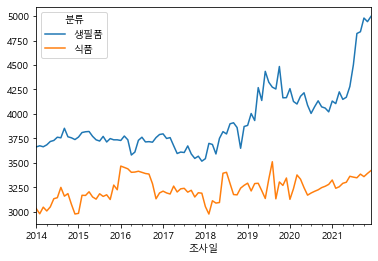

In [222]:
df.loc['신세계백화점'].groupby(['조사일','분류'])['판매가격'].mean().unstack().plot()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_1760/853892107.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5))


<Figure size 1080x360 with 0 Axes>

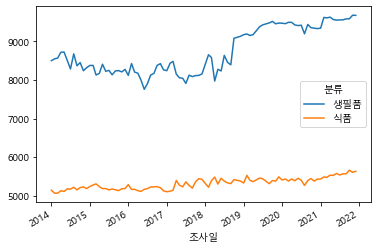

<Figure size 1080x360 with 0 Axes>

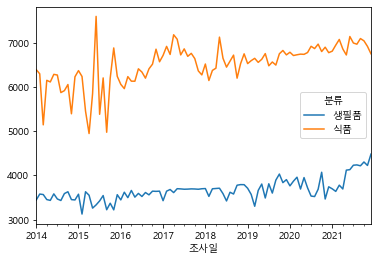

<Figure size 1080x360 with 0 Axes>

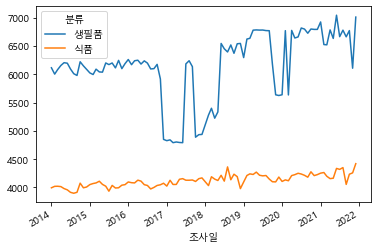

<Figure size 1080x360 with 0 Axes>

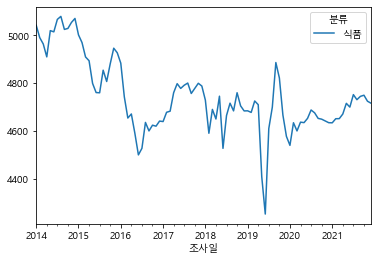

<Figure size 1080x360 with 0 Axes>

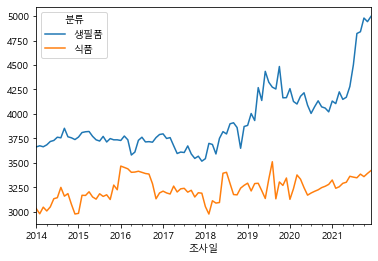

<Figure size 1080x360 with 0 Axes>

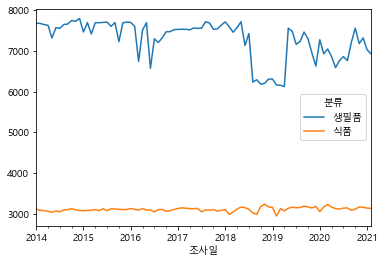

<Figure size 1080x360 with 0 Axes>

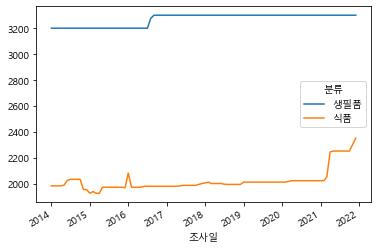

<Figure size 1080x360 with 0 Axes>

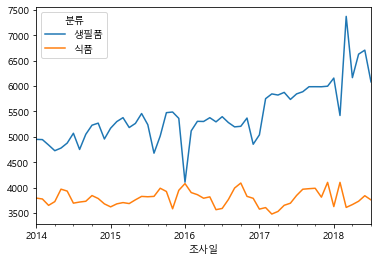

<Figure size 1080x360 with 0 Axes>

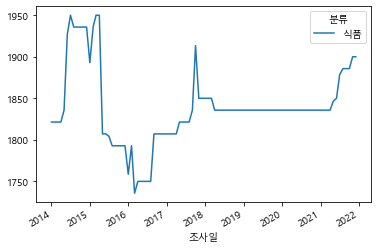

<Figure size 1080x360 with 0 Axes>

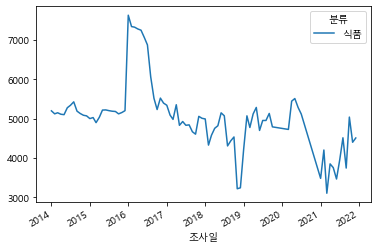

<Figure size 1080x360 with 0 Axes>

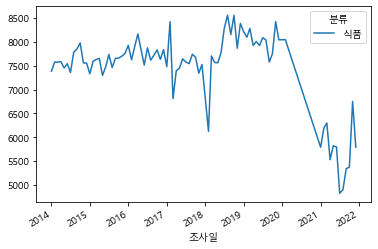

<Figure size 1080x360 with 0 Axes>

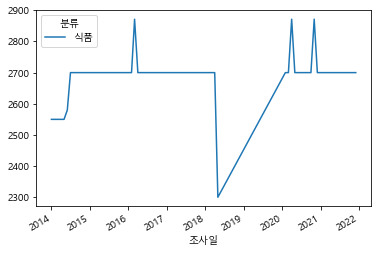

In [225]:
for idx in df.index.unique():
    fig = plt.figure(figsize=(15,5))
    df.loc[idx].groupby(['조사일','분류'])['판매가격'].mean().unstack().plot()

In [226]:
df.loc['신세계백화점'].groupby(['조사일','분류'])['판매가격'].count()

조사일         분류 
2014-01-01  생필품     54
            식품     189
2014-02-01  생필품     47
            식품     175
2014-03-01  생필품     81
                  ... 
2021-10-01  식품     244
2021-11-01  생필품     53
            식품     224
2021-12-01  생필품     53
            식품     237
Name: 판매가격, Length: 192, dtype: int64